In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from statistics import mode
from scipy.special import binom
from scipy.stats import iqr
pd.options.display.max_columns = None

In [2]:
df = pd.read_csv('palm_ffb.csv')

In [4]:
df.head()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


In [3]:
df.isna().sum()

Date             0
SoilMoisture     0
Average_Temp     0
Min_Temp         0
Max_Temp         0
Precipitation    0
Working_days     0
HA_Harvested     0
FFB_Yield        0
dtype: int64

In [5]:
# find out datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           130 non-null    object 
 1   SoilMoisture   130 non-null    float64
 2   Average_Temp   130 non-null    float64
 3   Min_Temp       130 non-null    float64
 4   Max_Temp       130 non-null    float64
 5   Precipitation  130 non-null    float64
 6   Working_days   130 non-null    int64  
 7   HA_Harvested   130 non-null    float64
 8   FFB_Yield      130 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.3+ KB


In [6]:
from datetime import datetime
from datetime import timedelta

In [7]:
# change to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.describe()

In [ ]:
# Find the number of duplicates
df.duplicated().sum()

In [ ]:
# find number of unique values
df.nunique()

In [8]:
# change date format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y',dayfirst = False)

In [9]:
print('max',df['Date'].max()) # max days
print('min',df['Date'].min()) # min days

max 2018-01-10 00:00:00
min 2008-01-01 00:00:00


In [10]:
# split time datetime into year, month, hour, day of week 
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.day
df['year_month'] = (
    df['Date'].dt.year.astype('str') + '_' +
    df['Date'].dt.day.astype('str').str.zfill(2)
)
df['dayofweek'] = df['Date'].dt.month

In [11]:
# create month abbreviations
# Import the calendar module
import calendar
    
# Extract month as a number from the date column
df['month']=pd.DatetimeIndex(df['Date']).day

# Using list comprehension extract month abbreviations for each month number
df['Month_abbr']=[calendar.month_abbr[int(i)] if pd.notna(i) else i for i in df['month']]

In [12]:
df.head()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield,year,month,year_month,dayofweek,Month_abbr
0,2008-01-01,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62,2008,1,2008_01,1,Jan
1,2008-01-02,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45,2008,2,2008_02,1,Feb
2,2008-01-03,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56,2008,3,2008_03,1,Mar
3,2008-01-04,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39,2008,4,2008_04,1,Apr
4,2008-01-05,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44,2008,5,2008_05,1,May


In [13]:
df.describe()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield,year,month,dayofweek
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.0
mean,527.646923,26.849918,21.379231,33.851538,188.980769,24.753846,793404.491565,1.602231,2012.923077,6.423077,1.0
std,57.367844,0.651413,0.688971,1.079638,80.237210,1.239289,34440.893854,0.281751,3.136718,3.434583,0.0
min,380.700000,25.158065,18.900000,31.100000,2.000000,21.000000,683431.944400,1.080000,2008.000000,1.000000,1.0
25%,488.625000,26.442285,21.000000,33.100000,140.300000,24.000000,768966.949100,1.390000,2010.000000,3.250000,1.0
50%,538.300000,26.930645,21.500000,33.900000,182.150000,25.000000,790036.158050,1.585000,2013.000000,6.000000,1.0
75%,571.025000,27.270726,21.800000,34.600000,226.100000,26.000000,821989.235250,1.807500,2016.000000,9.000000,1.0
max,647.300000,28.580000,22.600000,36.000000,496.100000,27.000000,882254.225400,2.270000,2018.000000,12.000000,1.0


In [ ]:
df.describe()

In [17]:
df2= df[['SoilMoisture', 'Average_Temp', 'Min_Temp', 'Max_Temp',
       'Precipitation', 'Working_days', 'HA_Harvested', 'FFB_Yield', 'year']]

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


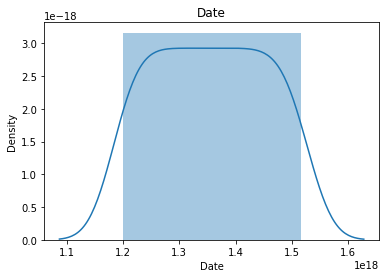

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


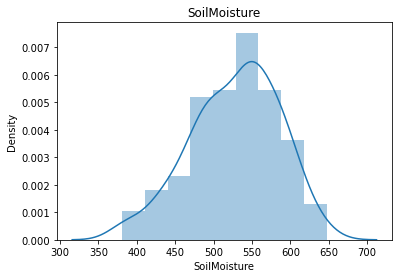

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


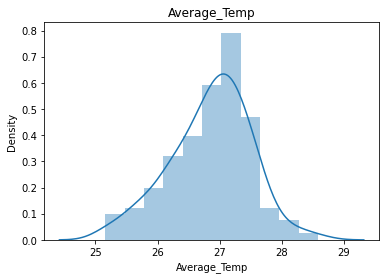

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


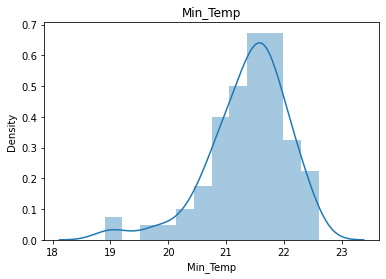

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


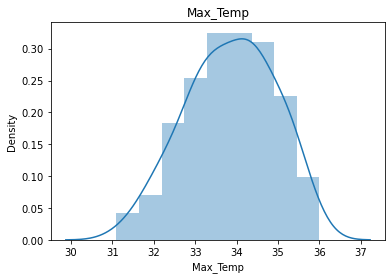

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


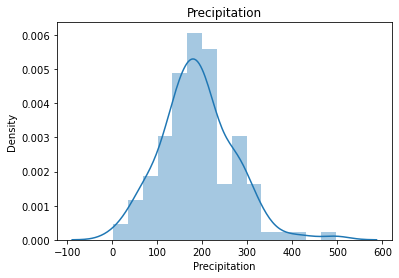

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


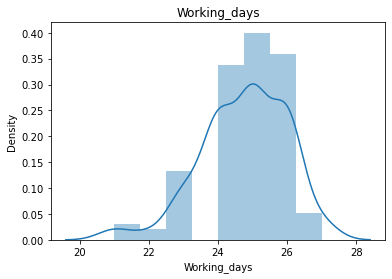

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


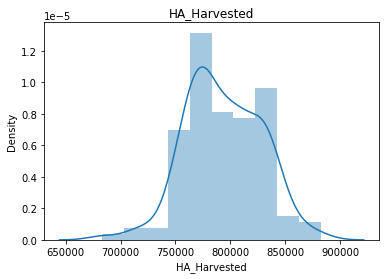

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


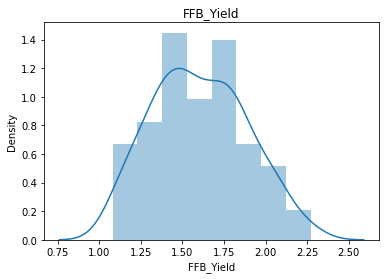

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


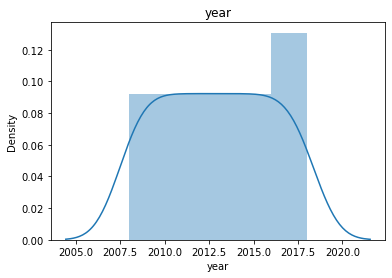

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


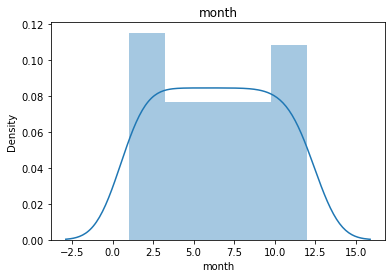

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


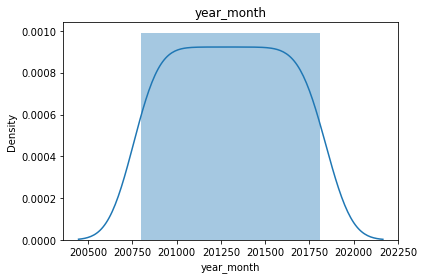

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


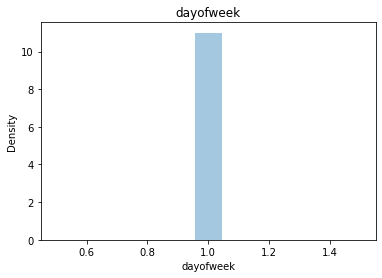

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: could not convert string to float: 'Jan'

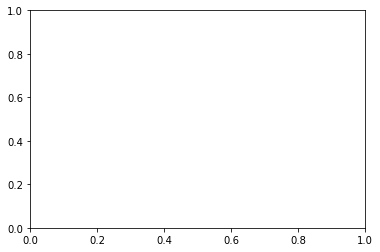

In [18]:
for i in df.columns:
    sns.distplot(df[i])
    plt.title(i)
    plt.show()

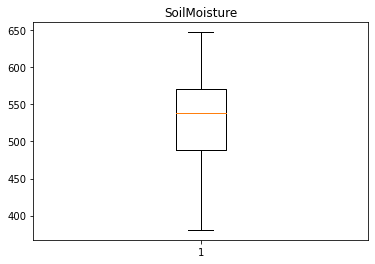

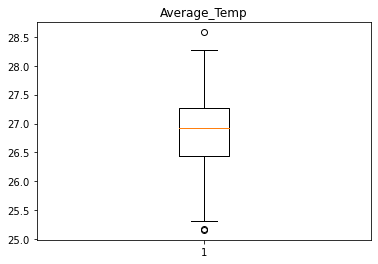

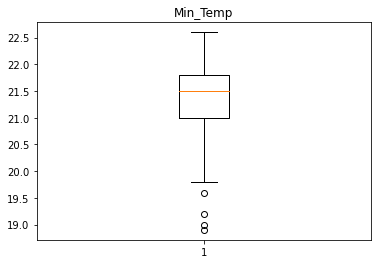

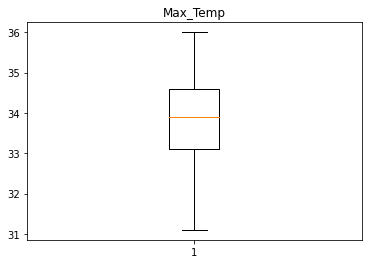

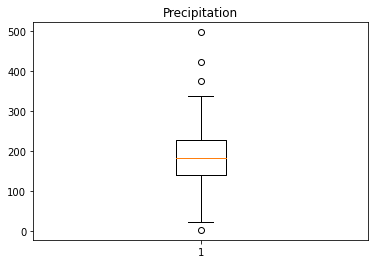

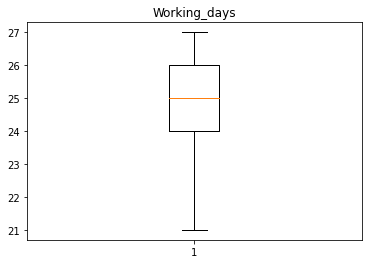

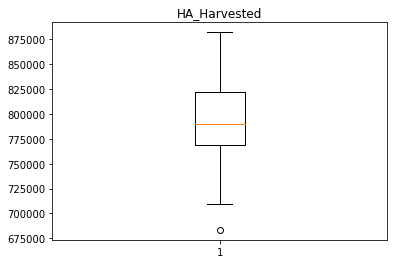

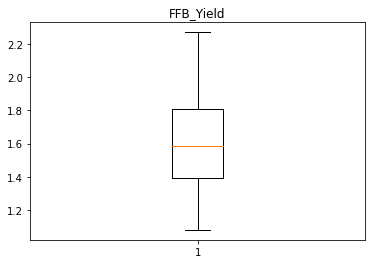

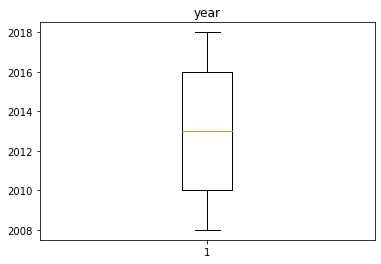

In [19]:
for i in df2.columns:
    plt.boxplot(df2[i])
    plt.title(i)
    plt.show()

In [45]:
df.loc[df['month'] == 2]

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield,year,month,year_month,dayofweek,Month_abbr
1,2008-01-02,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45,2008,2,2008_02,1,Feb
13,2009-01-02,494.5,26.700000,21.7,34.6,141.0,24,798306.1538,1.30,2009,2,2009_02,1,Feb
25,2010-01-02,458.2,27.492857,21.5,35.1,49.0,22,840834.4828,1.16,2010,2,2010_02,1,Feb
37,2011-01-02,594.9,26.217857,20.3,34.6,22.1,21,808268.1416,1.13,2011,2,2011_02,1,Feb
49,2012-01-02,547.2,26.372414,20.8,34.1,129.1,24,829962.3853,1.09,2012,2,2012_02,1,Feb
61,2013-01-02,590.2,25.825000,21.6,32.5,283.2,23,775247.9339,1.21,2013,2,2013_02,1,Feb
73,2014-01-02,457.8,26.882143,19.0,34.9,22.0,23,784703.3333,1.20,2014,2,2014_02,1,Feb
85,2015-01-02,480.6,26.632143,20.7,35.7,48.8,21,760754.8387,1.24,2015,2,2015_02,1,Feb
97,2016-01-02,519.1,26.441379,21.9,32.3,175.7,23,766853.1532,1.11,2016,2,2016_02,1,Feb
109,2017-01-02,576.6,25.967857,21.5,32.0,172.3,23,840881.8182,1.32,2017,2,2017_02,1,Feb


In [ ]:
df2.skew()

In [20]:
# abnormal value for precipitation --> data entry error
df['Precipitation'] = df['Precipitation'].replace(2,22)

In [21]:
# Identify outliers
df[df["Min_Temp"]<=np.percentile(df["Min_Temp"], 0.05)]

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield,year,month,year_month,dayofweek,Month_abbr
72,2014-01-01,584.9,25.158065,18.9,31.8,96.7,24,761886.0927,1.51,2014,1,2014_01,1,Jan


Outlier Insight
- Malaysia Experience Colder Weather In Jan 2014 Due To North-Easterly Wind From China

In [ ]:
df[df["Precipitation"]>=np.percentile(df["Precipitation"], 99.5)]

Outlier Insight
- The monsoon strengthened in January 2011 and persisted throughout the month. In January, most parts of Malaysia received rainfall amounts of more than 60% above the long term average. 

In [ ]:
df.min()

In [ ]:
df["Min_Temp"].describe()

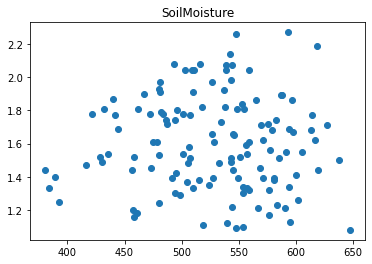

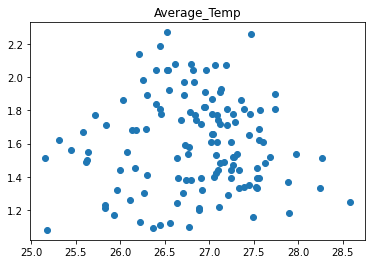

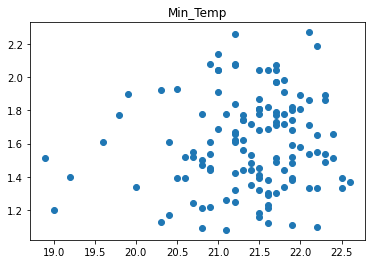

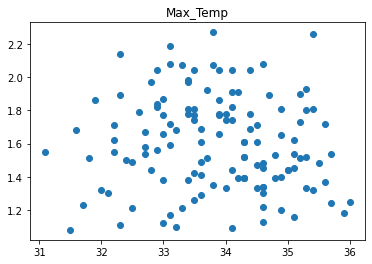

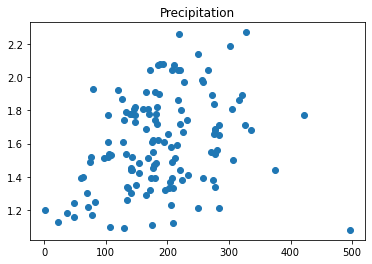

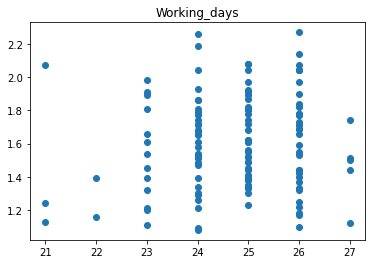

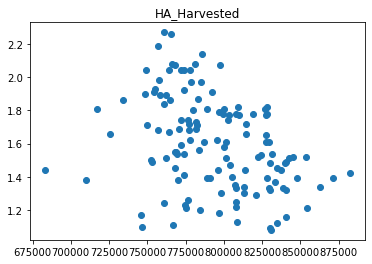

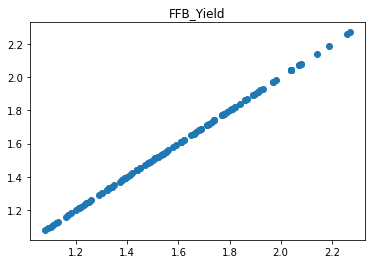

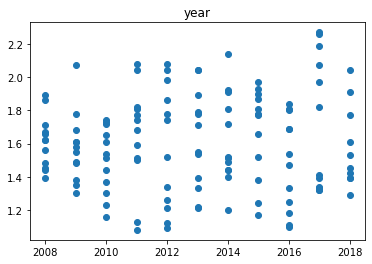

In [22]:
for i in df2.columns:
    plt.scatter(x = (df2[i]),y=df2['FFB_Yield'])
    plt.title(i)
    plt.show()

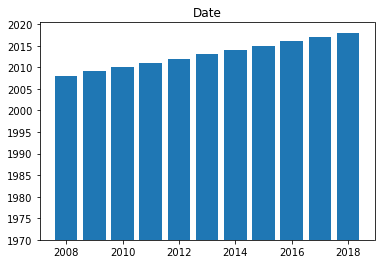

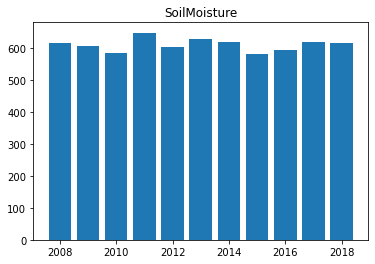

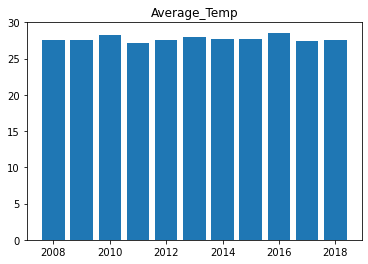

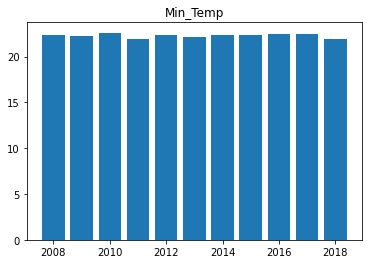

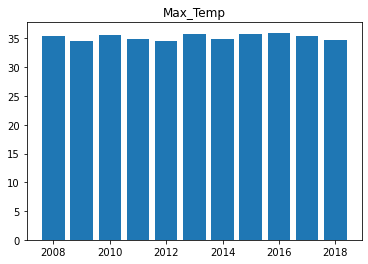

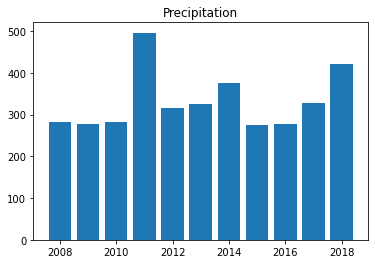

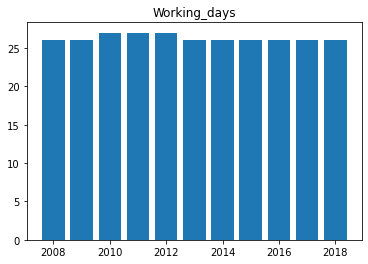

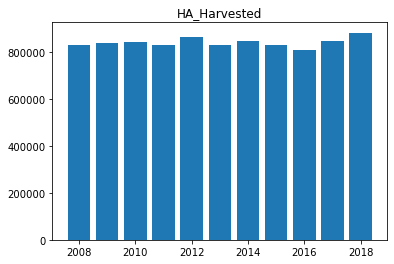

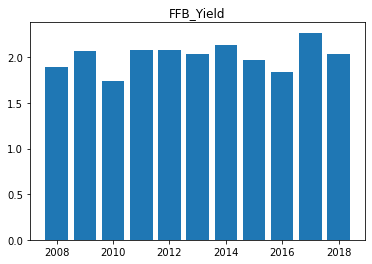

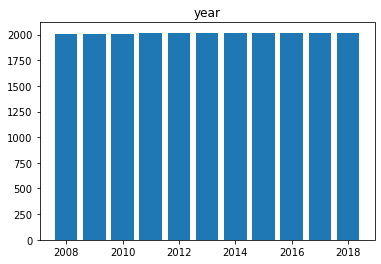

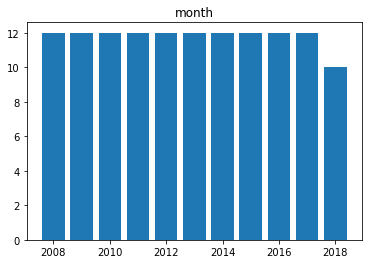

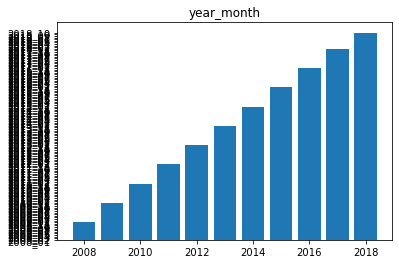

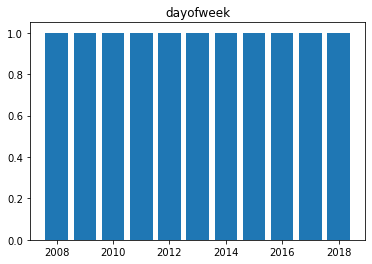

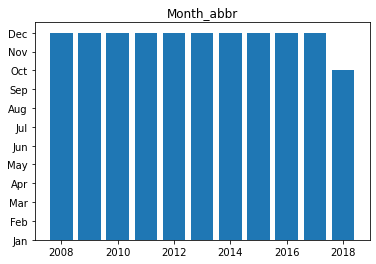

In [23]:
for i in df.columns:
    plt.bar(x = (df['year']),height=(df[i]))
    plt.title(i)
    plt.show()

### Correlation with target variable

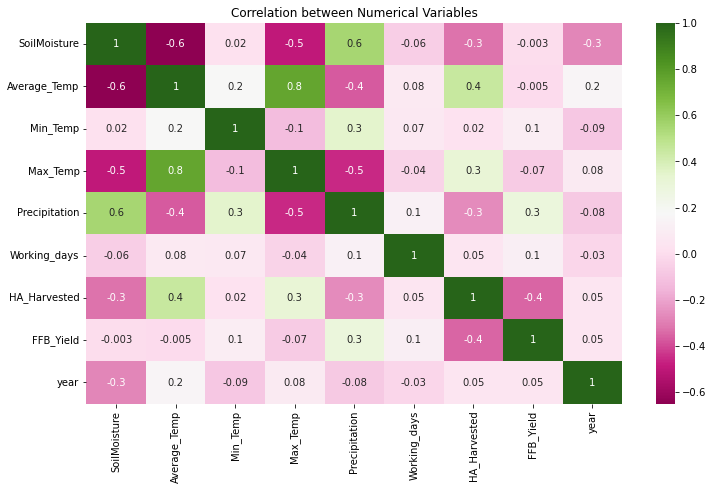

In [25]:
corr_matrix = df2.corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr_matrix, cmap='PiYG', annot=True, square=False, fmt='.1g')
plt.title('Correlation between Numerical Variables');

Insight
- Increase of Avg Temp cause lower soil moisture (-0.6)
- Higher precipitaion cause higher soil moisture (0.6)
- Max temp very strong correlation with Avg Temp (0.8)
- Avg temp increase, HA Harvested increase (0.4)
- High precipitation cause lower Avg Temp (0.4)
- High HA Harvested cause lower FFB Yield (-0.4)
- Month is very strongly correlated with yield (0.7)

In [24]:
print("Correlation with FFB Yield:\n")
corr_scores = df.corrwith(df.FFB_Yield)
corr_scores = corr_scores.sort_values(ascending=False)
print(corr_scores)

Correlation with FFB Yield:

FFB_Yield        1.000000
month            0.671277
Precipitation    0.288076
Working_days     0.116364
Min_Temp         0.103830
year             0.051947
SoilMoisture    -0.003183
Average_Temp    -0.005494
Max_Temp        -0.071201
HA_Harvested    -0.350222
dayofweek             NaN
dtype: float64


In [26]:
df_cat =  df[['year',
       'Month_abbr', 'year_month', 'dayofweek', 'Working_days']]

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


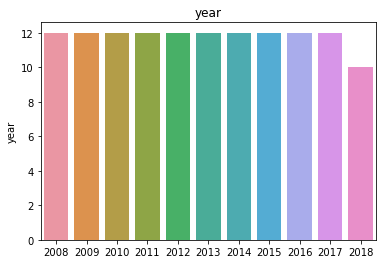

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


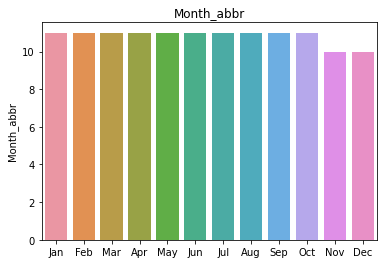

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


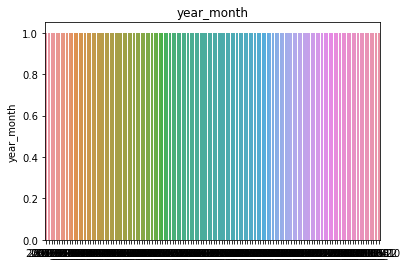

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


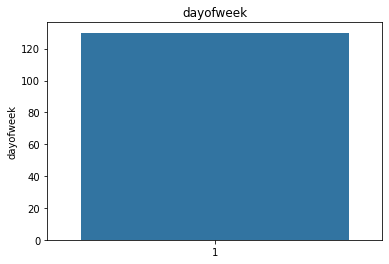

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


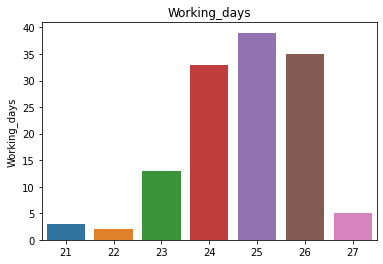

In [27]:
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()

In [28]:
df.Working_days.value_counts()

25    39
26    35
24    33
23    13
27     5
21     3
22     2
Name: Working_days, dtype: int64

In [ ]:
df.columns

<AxesSubplot:xlabel='Working_days'>

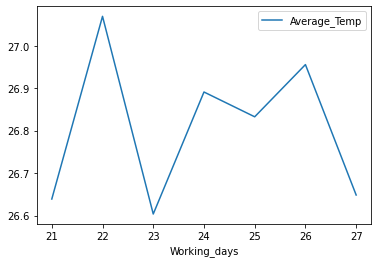

In [29]:
pd.pivot_table(df, index = 'Working_days', values = 'Average_Temp').plot()
# Highest temp with 22 working days
# Lowest temp with 23 working days

<AxesSubplot:xlabel='Working_days'>

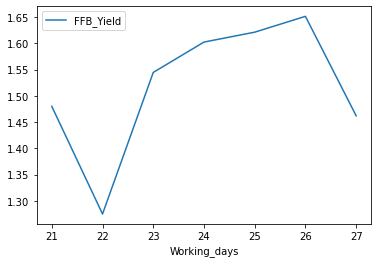

In [30]:
pd.pivot_table(df, index = 'Working_days', values = 'FFB_Yield').plot()
# Highest yield at 26 working days
# Lowest yield at 22 working days

In [31]:
pd.pivot_table(df, index = 'year', values = 'FFB_Yield')
# same result with year_month
# only the same month January

,FFB_Yield
year,
2008,1.612500
2009,1.573333
2010,1.500000
2011,1.645833
2012,1.585000
2013,1.624167
2014,1.625000
2015,1.666667
2016,1.484167


In [32]:
pd.pivot_table(df, index = 'Month_abbr', values = 'FFB_Yield').sort_values('FFB_Yield', ascending = False)
# Highest avg yield in Oct
# Lowest avg yield Feb

,FFB_Yield
Month_abbr,
Oct,1.971818
Sep,1.880000
Nov,1.824000
Aug,1.787273
Jul,1.716364
Dec,1.622000
Jun,1.546364
May,1.489091
Apr,1.408182


In [33]:
pd.pivot_table(df, index = 'Month_abbr', values = 'FFB_Yield', aggfunc = 'max').sort_values('FFB_Yield', ascending = False)
# Highest max yield recorded on Nov
# Lowest max yield on Feb

,FFB_Yield
Month_abbr,
Nov,2.27
Oct,2.26
Dec,2.19
Aug,2.14
Sep,2.08
Jul,1.87
Jun,1.82
May,1.81
Apr,1.78


In [34]:
pd.pivot_table(df,index =['Min_Temp','Max_Temp'], values = 'FFB_Yield').sort_values('FFB_Yield', ascending = False)
# Highest yield when temp 22.1 - 33.8
# Lowest yield when temp 21.1 - 31.5


,,FFB_Yield
Min_Temp,Max_Temp,
22.1,33.8,2.27
22.2,33.1,2.19
21.0,32.3,2.14
21.2,33.1,2.08
21.7,33.3,2.07
...,...,...
21.6,33.0,1.12
21.9,32.3,1.11
22.2,33.2,1.10


In [35]:
pd.pivot_table(df,index =['Min_Temp','Max_Temp'], values = 'SoilMoisture').sort_values('SoilMoisture', ascending = False)

,,SoilMoisture
Min_Temp,Max_Temp,
21.1,31.5,647.3
20.8,32.4,637.8
22.1,32.2,627.3
21.3,32.8,619.4
22.2,33.1,619.0
...,...,...
21.8,34.4,421.8
20.8,34.5,416.5
21.2,36.0,392.9


<AxesSubplot:xlabel='SoilMoisture', ylabel='FFB_Yield'>

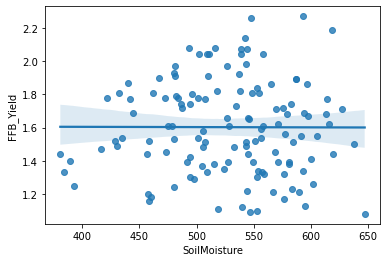

In [36]:
sns.regplot(data=df, x="SoilMoisture", y="FFB_Yield")

In [37]:
df[['Average_Temp','Precipitation','SoilMoisture','FFB_Yield']].corr()

,Average_Temp,Precipitation,SoilMoisture,FFB_Yield
Average_Temp,1.000000,-0.370876,-0.649878,-0.005494
Precipitation,-0.370876,1.000000,0.552007,0.288076
SoilMoisture,-0.649878,0.552007,1.000000,-0.003183
FFB_Yield,-0.005494,0.288076,-0.003183,1.000000


<AxesSubplot:>

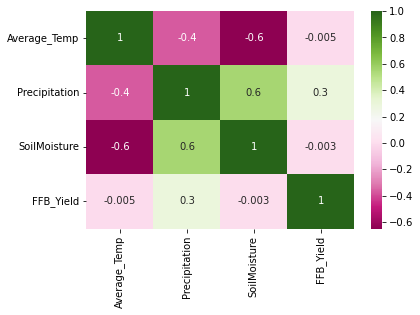

In [38]:
sns.heatmap(df[['Average_Temp','Precipitation','SoilMoisture','FFB_Yield']].corr(), cmap='PiYG', annot=True, square=False, fmt='.1g')



<AxesSubplot:xlabel='SoilMoisture', ylabel='FFB_Yield'>

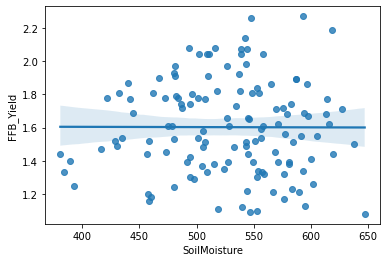

In [40]:
sns.regplot(data=df, x="SoilMoisture", y="FFB_Yield")
# Lowest and highest soil moisture result in lowest yield

In [41]:
df.SoilMoisture.describe()

count    130.000000
mean     527.646923
std       57.367844
min      380.700000
25%      488.625000
50%      538.300000
75%      571.025000
max      647.300000
Name: SoilMoisture, dtype: float64

In [42]:
pd.pivot_table(df, index = ['year','Month_abbr','SoilMoisture'], values = 'FFB_Yield').sort_values( 'FFB_Yield', ascending = False)
# Dec highest soil moisture
# Jul lowest soil moisture
# Nov 2017 highest yield with mean of soil moisture 592.9
# Jan 2011 lowest yield with highest soil moisture 647.3

FFB_Yield
year Month_abbr SoilMoisture           
2017 Nov        592.9              2.27
     Oct        547.5              2.26
     Dec        619.0              2.19
2014 Aug        542.8              2.14
2011 Sep        516.4              2.08
...                                 ...
2012 Mar        539.9              1.12
2016 Feb        519.1              1.11
     Jan        553.4              1.10
2012 Feb        547.2              1.09
2011 Jan        647.3              1.08

[130 rows x 1 columns]

In [43]:
pd.pivot_table(df, index = ['year','Month_abbr','SoilMoisture'], values = 'Precipitation').sort_values( 'Precipitation', ascending = False)
# Jan 2011 highest precipitation, give highest soil moiture
# 

,,,Precipitation
year,Month_abbr,SoilMoisture,
2011,Jan,647.3,496.1
2018,Jan,613.9,422.1
2014,Dec,619.4,374.9
2011,Nov,613.5,336.2
2017,Nov,592.9,327.3
...,...,...,...
2010,Feb,458.2,49.0
2015,Feb,480.6,48.8
2016,Mar,460.5,36.5


In [ ]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('clean_date.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
df.to_excel(writer, sheet_name='Sheet1')

# Close the Pandas Excel writer and output the Excel file.
writer.save()